*Car Purchase Amount Prediction using Machine Learning*

*We are going to develop a machine learning model to predict the total dollar amount that* 
*customers are willing to pay while puchasing a car given the following attributes*

1. Customer Name
2. Customer e-mail 
3. Country
4. Gender 
5. Age 
6. Annual Salary
7. Credit Card Debt
8. Net Worth

The model should predict:

-> Car Purchase Amount

In [2]:
import warnings 

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('Car_Purchasing_Data.csv')

*Display Top 5 Row of the Dataset*

In [6]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


*Check Last 5 Rows of Dataset*

In [7]:
data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


*Find Shape of Our Dataset*

In [8]:
data.shape

(500, 9)

In [9]:
print('Number of Rows', data.shape[0])
print('Number of Columns', data.shape[1])

Number of Rows 500
Number of Columns 9


*Get Information About our Dataset* 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


*Check Null Values in The Dataset*

In [11]:
data.isnull().sum() 

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

*Get Overall Statistics about Dataset*

In [12]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


*Visualization*

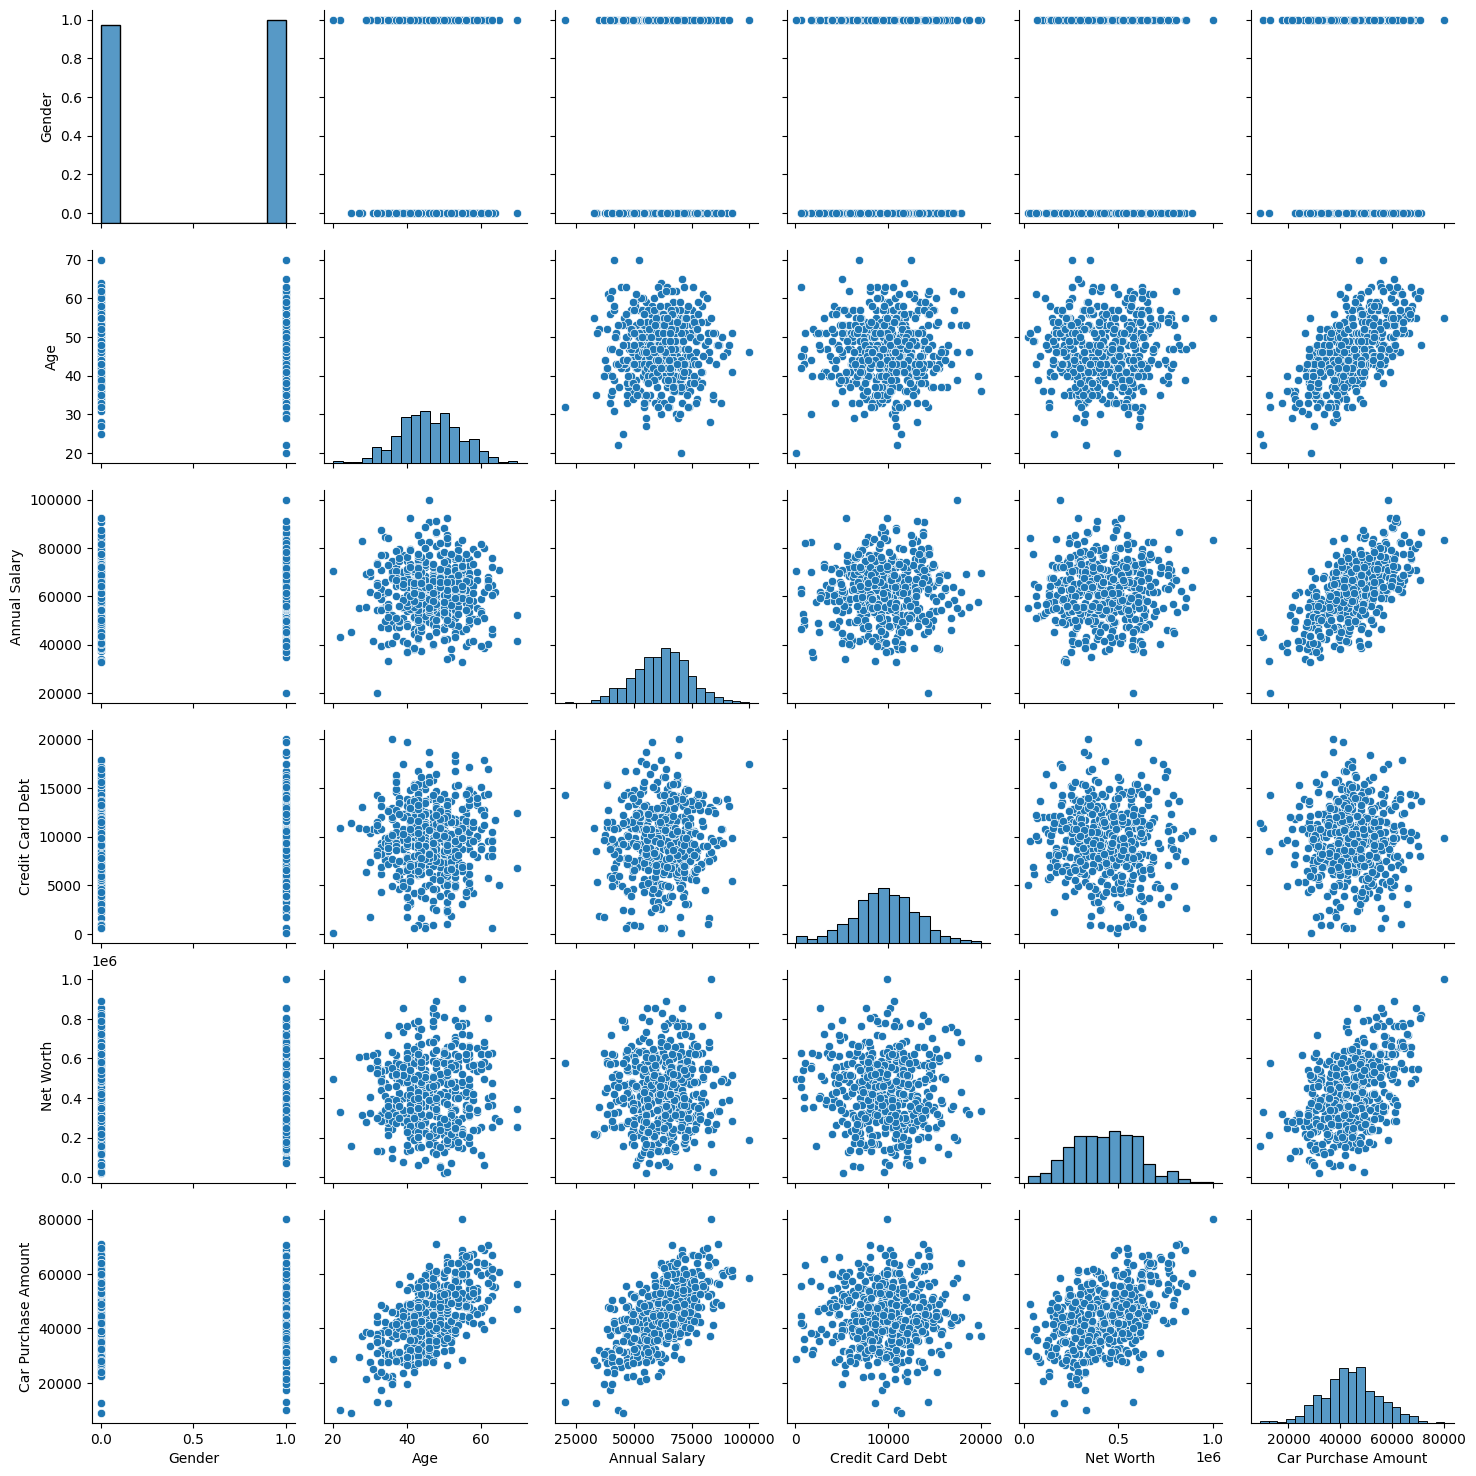

In [13]:
plt.Figure(figsize = (10,6))
sns.pairplot(data)

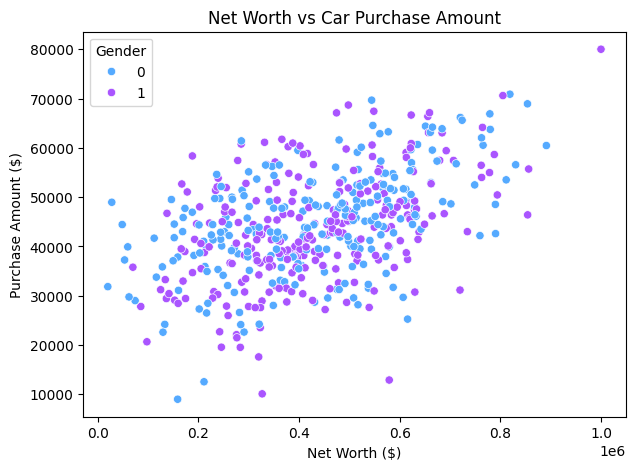

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Net Worth', y='Car Purchase Amount', data=data, hue='Gender', palette='cool')
plt.title('Net Worth vs Car Purchase Amount')
plt.xlabel('Net Worth ($)')
plt.ylabel('Purchase Amount ($)')
plt.show()

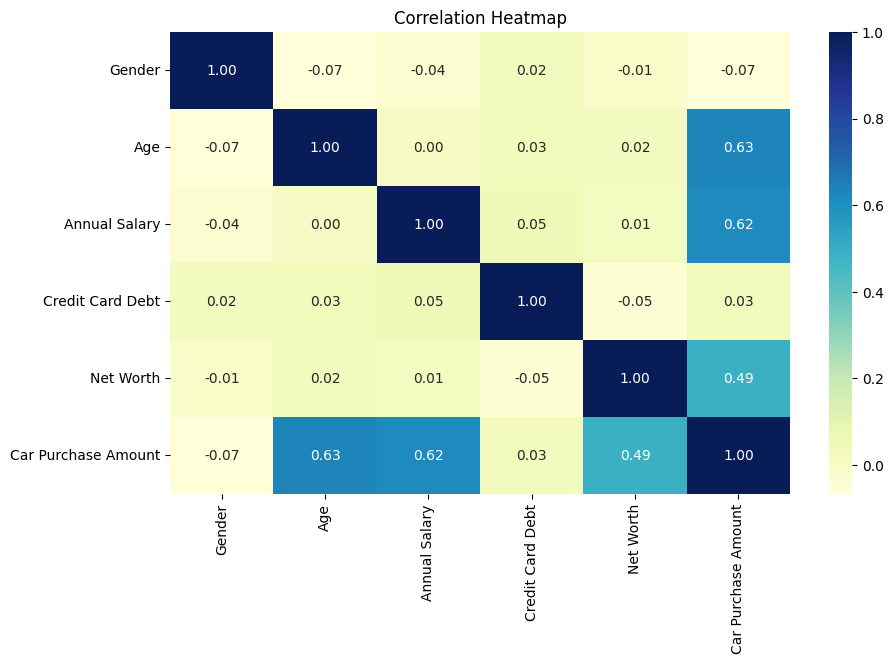

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


*Store Feature Matrix in X and Response(Target) in Vector y*

In [15]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [16]:
X = data.drop(['Customer Name', 'Customer e-mail', 'Country','Car Purchase Amount'],axis=1)
y = data['Car Purchase Amount']

*Feature Scaling (Normalization)*

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [19]:
sc1 = MinMaxScaler()

In [20]:
y_reshape =y.values.reshape(-1,1)

In [21]:
y_scaled = sc1.fit_transform(y_reshape)

*Splitting The Dataset into Training and Testing Set*

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

*Import the Models*

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

*Model Training*

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

kn = KNeighborsRegressor()
kn.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


*Building the Artificial Neural Network*

In [26]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

Initialize the ANN

In [27]:
ann = Sequential()

Adding Input Layer and first hidden layer

In [28]:
ann.add(Dense(25,input_dim =5,activation = 'relu'))

Adding Second hidden layer

In [29]:
ann.add(Dense(25,activation = 'relu'))

Adding Output layer

In [30]:
ann.add(Dense(1,activation='linear'))

Training the ANN

In [31]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826 (3.23 KB)

 Trainable params: 826 (3.23 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
ann.compile(optimizer='adam',loss = 'mean_squared_error')

In [33]:
ann.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1326 - val_loss: 0.0586
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0437 - val_loss: 0.0123
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0126 - val_loss: 0.0137
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0130 - val_loss: 0.0090
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095 - val_loss: 0.0068
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0081 - val_loss: 0.0060
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053 - val_lo

*Predicition on Test Data*

In [34]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = dt.predict(X_test)
y_pred4 = kn.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)
y_pred7 = xg.predict(X_test)
y_pred8 = ann.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


*Evaluating on Test Data*

In [35]:
from sklearn import metrics

In [36]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)
score7 = metrics.r2_score(y_test,y_pred7)
score8 = metrics.r2_score(y_test,y_pred8)

In [37]:
print(score1,score2,score3,score4,score5,score6,score7,score8)

0.9994234310992762 0.9547066777872097 0.8774736865651941 0.8757732965890116 0.9500520709872319 0.9744322255634119 0.9505777322717386 0.9929323136466179


In [38]:
final_data = pd.DataFrame({'Models':['LR',"SVR",'DTR','KNN','RF','GBR','XGB','ANN'],
             'R2_SCORE':[score1,score2,score3,score4,score5,score6,score7,score8]})

In [39]:
final_data

,Models,R2_SCORE
0,LR,0.999423
1,SVR,0.954707
2,DTR,0.877474
3,KNN,0.875773
4,RF,0.950052
5,GBR,0.974432
6,XGB,0.950578
7,ANN,0.992932


<Axes: xlabel='Models', ylabel='R2_SCORE'>

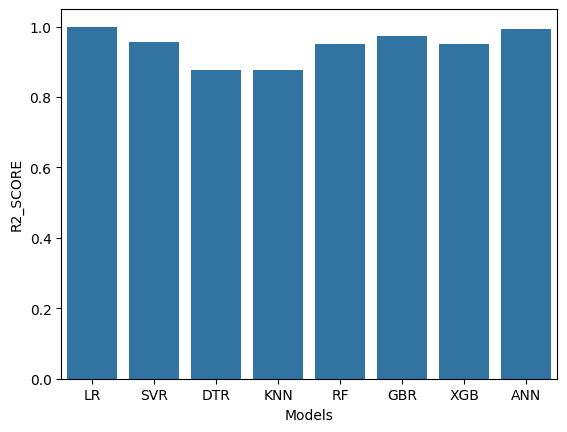

In [40]:
sns.barplot(x = final_data['Models'],y = final_data['R2_SCORE'])

*Save The Model*

In [41]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
ann1 = Sequential()

In [43]:
ann1.add(Dense(units=25,input_dim =5,activation = 'relu'))
ann1.add(Dense(units=25,activation = 'relu'))
ann1.add(Dense(units=1,activation = 'linear'))

In [44]:
ann1.compile(optimizer='adam',loss = 'mean_squared_error')
ann1.fit(X_scaled,y_scaled,epochs=100,batch_size=50,verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3965  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1789 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0670 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0304 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

In [45]:
import joblib

In [46]:
joblib.dump(ann1,'car_model')

['car_model']

In [47]:
model = joblib.load('car_model')

*Prediction on New Data*

In [48]:
import numpy as np

In [49]:
data.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.38091,238961.2505,35321.45877


In [50]:
X_test1 =  sc.transform(np.array([[0,42,62812.09301,11609.38091,238961.2505]]))

In [51]:
X_test1

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985]])

In [52]:
pred = ann1.predict(X_test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [53]:
sc1.inverse_transform(pred)

array([[35582.824]], dtype=float32)